<h2>Regresja logistyczna – przewidywanie zwycięzcy meczu tenisowego na podstawie danych pośrednich zebranych w latach 2000-2020
</h2>

<h3>Cel</h3>
    
    Celem badania było oszacowanie dokładności modelu regresji logistycznej mającego na celu wskazanie zwycięzcy meczu      tenisowego na podstawie historycznych danych pośrednich (warunki kortu, średnia kursu bukmacherskiego, ranking gracza,    liczba rozegranych setów). Jeden wiersz danych reprezentuje jeden rozegrany mecz. Na potrzeby modelu wybrane zostały        dane tylko dla jednego z graczy - Diego Schwartzman. 
    
<h3>Załadowanie danych</h3>

    Zmienna zależna data została rozdzielona na 2 grupy - miesiąc, rok. Zmienne jakościowe, przy pomocy funkcji pakietu         pandas 'get.dummies' zostały przekształcone na zmienne ilościowe. Dane zostały ograniczone dla wyników dla jednego         z graczy, w ten sposób mogliśmy precyzyjnie określić funkcję celu - y jako zwycięstwo lub przegrana tego gracza.
    
Pełny opis danych znajduje się na stronie: <a>http://tennis-data.co.uk/notes.txt</a>

    
<h4>Przekazanie danych z plików .xlsx do data frame - dane z każdego roku zostały zapisane w oddzielnych plikach.</h4>    

```python
all_data = pd.DataFrame()
for f in glob.glob("Data/*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=False)    
```

<h4>Określenie kolumn, które zostaną uwzględnione w modelu (rozdzielenie zmiennej data na rok i miesiąc, ograniczenie wyników dla jednego z graczy, zamiana zmiennych jakościowych na ilościowe, utworzenie zmiennej zależnej):<h4>
    
```python
columns = ['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Winner', 'Loser',                    'WRank', 'LRank' ,'WPts', 'LPts', 'Wsets', 'Lsets', 'MaxW', 'MaxL', 'AvgW', 'AvgL']

df = data[columns]
    
df['Month'] = pd.DatetimeIndex(df['Date']).month
    
df['Year'] = pd.DatetimeIndex(df['Date']).year
    
df = df[(df["Winner"] == "Schwartzman D.") | (df["Loser"] == "Schwartzman D.")]
    
df['Class'] = np.where(

df['Winner'] == "Schwartzman D.", 1,0)

df = df.loc[:, df.columns != 'Winner']

df = df.loc[:, df.columns != 'Loser']

df = df.loc[:, df.columns != 'Date']
```

<h4>Analiza korelacji zmiennych zależnych wobec zmiennej zależnej:</h4>

Jednym z założeń regresji logistycznej jest to, aby w modelu uwzględnić tylko zmienne niezależne mające istotny wpływ na zmienną zależną. 

Do sprawdzenia zależności użyjemy funkcji 'corr', która wykorzystuje współczynnik korelacji Kendalla.

```python
CORREL = df.corr().sort_values('Class')
CORREL['Class']
```
    
|                                                         |        Class |
|:--------------------------------------------------------|-------------:|
| WPts                                                    | -0.20421     |
| WRank                                                   | -0.186278    |
| MaxL                                                    | -0.118228    |
| AvgL                                                    | -0.113364    |
| LPts                                                    | -0.104966    |
| Surface_Grass                                           | -0.10148     |
| Round_The Final                                         | -0.0947006   |
| Location_Bucharest                                      | -0.0916841   |
| Tournament_BRD Nastase Tiriac Trophy                    | -0.0916841   |
| Tournament_AEGON Open                                   | -0.0916841   |
| Location_Nottingham                                     | -0.0916841   |
| Tournament_Grand Prix Hassan II                         | -0.0916841   |
| Location_Eastbourne                                     | -0.0916841   |
| Location_Indian Wells                                   | -0.0833025   |
| Tournament_BNP Paribas Open                             | -0.0833025   |
| Location_Shanghai                                       | -0.0710771   |
| Tournament_Shanghai Masters                             | -0.0710771   |
| Location_Vina del Mar                                   | -0.0647197   |
| Tournament_VTR Open                                     | -0.0647197   |
| Tournament_German Open Tennis Championships             | -0.0647197   |
| Tournament_ATP Vegeta Croatia Open                      | -0.0647197   |
| Location_Umag                                           | -0.0647197   |
| Location_Casablanca                                     | -0.0647197   |
| Tournament_bet-at-home Open                             | -0.0647197   |
| Location_Houston                                        | -0.0647197   |
| Tournament_U.S. Men's Clay Court Championships          | -0.0647197   |
| Tournament_St. Petersburg Open                          | -0.0647197   |
| Location_St. Petersburg                                 | -0.0647197   |
| Tournament_ASB Classic                                  | -0.0647197   |
| Location_Marrakech                                      | -0.0647197   |
| Tournament_Gazprom Hungarian Open                       | -0.0647197   |
| Location_Budapest                                       | -0.0647197   |
| Tournament_Eastbourne International                     | -0.0647197   |
| Location_Bastad                                         | -0.0631706   |
| Tournament_SkiStar Swedish Open                         | -0.0631706   |
| Location_Miami                                          | -0.0591872   |
| Tournament_Sony Ericsson Open                           | -0.0591872   |
| Location_London                                         | -0.0591872   |
| Tournament_Wimbledon                                    | -0.0591872   |
| Court_Outdoor                                           | -0.0558354   |
| Round_3rd Round                                         | -0.0555579   |
| Series_Masters 1000                                     | -0.0510395   |
| Location_Auckland                                       | -0.0444375   |
| Tournament_Brisbane International                       | -0.0444375   |
| Location_Brisbane                                       | -0.0444375   |
| Tournament_Open Banco Sabadell                          | -0.0444375   |
| Location_Barcelona                                      | -0.0444375   |
| Location_Munich                                         | -0.0444375   |
| Tournament_BMW Open                                     | -0.0444375   |
| Tournament_Abierto Mexicano                             | -0.0399369   |
| Location_Cincinnati                                     | -0.0399369   |
| Tournament_Western & Southern Financial Group Masters   | -0.0384473   |
| Round_Quarterfinals                                     | -0.0271496   |
| Lsets                                                   | -0.017509    |
| Tournament_BNP Paribas Masters                          | -0.0171557   |
| Location_Hamburg                                        | -0.0171557   |
| Location_Kitzbuhel                                      | -0.0148056   |
| Tournament_Sydney International                         | -0.012047    |
| Location_Sydney                                         | -0.012047    |
| Tournament_Generali Open                                | -0.012047    |
| Tournament_China Open                                   | -0.00848927  |
| Location_Beijing                                        | -0.00848927  |
| Tournament_Open de Nice Côte d’Azur                     | -0.00848927  |
| Location_Nice                                           | -0.00848927  |
| Tournament_Heineken Open                                | -0.00848927  |
| Tournament_Bet-At-Home Cup                              | -0.00848927  |
| Tournament_Copa Claro                                   | -0.00848927  |
| Round_2nd Round                                         | -0.00211318  |
| Series_ATP500                                           |  8.14877e-18 |
| Tournament_Monte Carlo Masters                          |  0.00162029  |
| Location_Monte Carlo                                    |  0.00162029  |
| Round_Semifinals                                        |  0.0023285   |
| AvgW                                                    |  0.00557629  |
| Location_Sao Paulo                                      |  0.00640789  |
| Tournament_Brasil Open                                  |  0.00640789  |
| Location_Madrid                                         |  0.00640789  |
| Tournament_Mutua Madrid Open                            |  0.00640789  |
| Location_Tokyo                                          |  0.0129525   |
| Tournament_Rakuten Japan Open Tennis Championships      |  0.0129525   |
| Location_Buenos Aires                                   |  0.0185355   |
| Surface_Hard                                            |  0.0207028   |
| MaxW                                                    |  0.021308    |
| Location_Melbourne                                      |  0.0228329   |
| Tournament_Australian Open                              |  0.0228329   |
| Tournament_Argentina Open                               |  0.0228329   |
| Tournament_Queen's Club Championships                   |  0.0236074   |
| Location_Queens Club                                    |  0.0236074   |
| Location_Toronto                                        |  0.0236074   |
| Location_Chengdu                                        |  0.0236074   |
| Tournament_Chengdu Open                                 |  0.0236074   |
| Location_New York                                       |  0.0266047   |
| ATP                                                     |  0.029425    |
| Tournament_US Open                                      |  0.0308526   |
| Tournament_Cordoba Open                                 |  0.0335594   |
| Location_Cordoba                                        |  0.0335594   |
| Round_4th Round                                         |  0.0335594   |
| Location_Montreal                                       |  0.0335594   |
| Tournament_German Tennis Championships                  |  0.0335594   |
| Tournament_Winston-Salem Open at Wake Forest University |  0.0335594   |
| Location_Winston-Salem                                  |  0.0335594   |
| Location_Rome                                           |  0.0412861   |
| Tournament_Internazionali BNL d'Italia                  |  0.0412861   |
| Tournament_Rogers Masters                               |  0.0413174   |
| Tournament_Erste Bank Open                              |  0.0413174   |
| Location_Vienna                                         |  0.0413174   |
| Location_Paris                                          |  0.0463362   |
| Location_Cologne                                        |  0.0469832   |
| Tournament_bett1HULKS Championship                      |  0.0469832   |
| Series_Grand Slam                                       |  0.0475534   |
| Location_Rio de Janeiro                                 |  0.0479624   |
| Tournament_Rio Open                                     |  0.0479624   |
| Month                                                   |  0.0512361   |
| Location_Antwerp                                        |  0.0610976   |
| Tournament_European Open                                |  0.0610976   |
| Wsets                                                   |  0.0628266   |
| Tournament_French Open                                  |  0.0644856   |
| Location_Los Cabos                                      |  0.106013    |
| Tournament_Abierto Mexicano Mifel                       |  0.106013    |
| Location_Istanbul                                       |  0.117085    |
| Tournament_Istanbul Open                                |  0.117085    |
| Year                                                    |  0.207803    |
| LRank                                                   |  0.242106    |
| Class                                                   |  1           |                                                 
    
    
Do ostatecznego modelu nie bierzemy pod uwagę poniższych zmiennych, ponieważ w bardzo małym stopniu wpływają na zmienną zależną (<0,1).<br></br>
Dla wybranych lokalizacji i turniejów współczynnik korelacji jest większy od 0,1, zatem w modelu uwzględniamy wszyskie lokalizacje i turnieje.

|                                                         |Współczynnik korelacji |
|:--------------------------------------------------------|----------------------:|
| Lsets                                                   | -0.017509             |
| Wsets                                                   |  0.0628266            |
| ATP                                                     |  0.029425             |
| Month                                                   |  0.0512361            |  
  
    
Dodatkowo odrzucamy wszyskie zmienne związane z serią turnieju - ich współczynik wynosi <= 0,05.
                                                                                               
  <h4>Przykładowe kilka wierszów ramki danych:</h4>
    
|      |   Class |   WRank |   WPts |   MaxW |   AvgL |   Year |   Location_Antwerp |   Tournament_AEGON Open |   Round_Quarterfinals |   Court_Outdoor |
|-----:|--------:|--------:|-------:|-------:|-------:|-------:|-------------------:|------------------------:|----------------------:|----------------:|
|  300 |       0 |      73 |    708 |   1.77 |   2.18 |   2013 |                  0 |                       0 |                     0 |               1 |
|  433 |       1 |     166 |    333 |   2.92 |   1.46 |   2013 |                  0 |                       0 |                     0 |               1 |
|  453 |       0 |      95 |    545 |   1.62 |   2.42 |   2013 |                  0 |                       0 |                     0 |               1 |
|  535 |       0 |       5 |   5755 |   1.04 |  12.79 |   2013 |                  0 |                       0 |                     0 |               1 |
| 1609 |       0 |     104 |    538 |   2.16 |   1.74 |   2013 |                  0 |                       0 |                     0 |               1 |


<h4>Analiza zbilansowania zmiennych zależnych:</h4>
    O zbiorze możemy powiedzieć zbilansowany, kiedy liczba wystapień wszystkich jego stanów jest zbliżona do siebie.
    
```python
    df.Class.value_counts(dropna = False)
```
 
|    |   Class |
|---:|--------:|
|  1 |     162 |
|  0 |     131 |




Nasz zbiór danych jest bardzo dobrze zbilansownay, 162 stanów '1' do 131 stanów '0'.

<br></br>
<br></br>
  
<h4>Analiza korelacji zmiennych zależnych:</h4>
    Kolejnym z założeń regresji logistycznej jest to, aby w modelu uwzględnić tylko zmienne niezależne w małym stopniu skorelowane ze sobą. W modelu przyjęto, że współczynnik korealacji Kendalla na poziomie >0,9 eliminuje zmienne z modelu.

|       | MaxW | MaxL |
|------:|-----:|-----:|
|  AvgW |  0.977610 | -0.313740    |
|  AvgL | -0.305728 | 0.970119     |





|                            | Location_Buenos Aires  |
|---------------------------:|-----------------------:|
|  Tournament_Argentina Open | 0.935964               |


Pary zmiennych niezaleznych (MaxW,AvgW), (MaxL, AvgL), (Lokalizacja, Turniej) są wysoce skorelowane ze sobą - uwzględnianie ich obu nie poprawia dokładności modelu. W ostatecznym modelu odrzucone zostaną zmienne związane z lokalizacją oraz MaxW i MaxL - maksymalny kurs bukmacherski na zwycięstwo przegranego i zwycięzcy.


<h4>Model Regresji Logistycznej:</h4>

Przypisanie zmiennych niezależnych do szeregu x oraz zmiennej zależnej do szeregu y:

```python
x = df.drop(['Class'],axis=1).values
y = df['Class'].values
```


Podział na zbiór treningowy i zbiór testowy (25% danych będa stanowić zbiór testowy):
```python
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
```

Utworzenie instancji modelu:
```python
logreg = LogisticRegression(max_iter=10000)
```

Dopasowanie modelu do danych:
```python
logreg.fit(x_train,y_train)
```
Przewidywanie wyniku zbioru testowego:
```python
y_pred = logreg.predict(x_test)
```

Utworzenie macierzy pomyłek:
```python
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
```

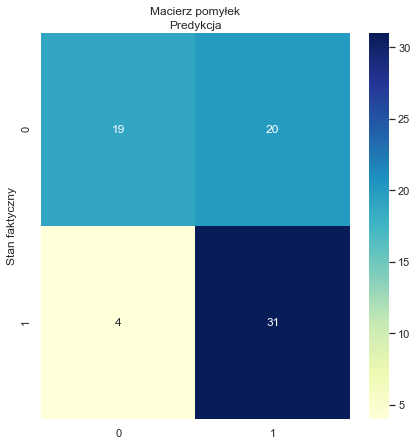

40 z przypadków zostało prawidłowo zakfalifikowanych zaś, 24 błędnie.

4 z 23 wygranych meczów zostały błędnie zaklasyfikowane jako przegrane. 20 z 51 przegranych meczów zostało błędnie zaklasyfikowanych jako wygrane.


Precyzja, dokładność, czułość:
```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)
```

|       | precision | recall | f1-score | support |
|------:|-----:|-----:|-----:|-----:|
|  0 |  0.83 | 0.49 | 0.61 | 39 |
|  1 |  0.61 | 0.89 | 0.72 | 35 |
| accuracy | | | 0.68 | 74 | 
| macro avg | 0.72 | 0.69 | 0.67 | 74 |
| weighted avg | 0.72 | 0.68 | 0.66 | 74 |

Precyzja określa jaka część wyników wskazanych przez klasyfikator jako dodatnie jest faktycznie dodatnia.

Liczona jest ze wzoru:
$$\left( \frac{PP}{PP + FP} \right)$$

$$\left( \frac{19}{19 + 4} \right)$$

$$\left( \frac{31}{31 + 20} \right)$$



PP- PRAWDZIWIE POZYTYWNE
FP - FAŁYSZWIE POZYTYWNE

Dla stanu 0 wynosi 0.83.
Dla stanu 1 wynosi 0.61.
Średnia wynosi 0.72.

 
Czułość dla klasy X, jest to stosunek poprawnie rozpoznanych elementów z X (PP) do wszystkich, które powinien rozpoznać, czyli do całej klasy X (PP+FN). Miara ta mówi, nam ile obserwacji 'zgubiliśmy dla danej klasy'.

$$\left( \frac{PP}{PP + FN} \right)$$

$$\left( \frac{19}{19 + 20} \right)$$

$$\left( \frac{31}{31 + 4} \right)$$

PP- PRAWDZIWIE POZYTYWNE
FP - FAŁYSZWIE POZYTYWNE

Dla stanu 0 wynosi 0.49.
Dla stanu 1 wynosi 0.89.
Średnia wynosi 0.69.

W 69% przypadków nasz model prawidłowo zaklasyfikowuje przypadki.


Support - ilość wystąpień.

<h4>Wykres ROC:</h4>

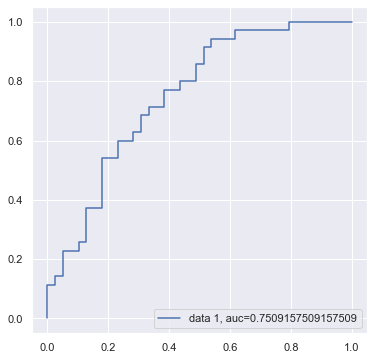


Interpretacja AUC (Area Under the ROC) to prawdopodobieństwo, że badany model predykcyjny oceni wyżej losowy element klasy pozytywnej od losowego elementu klasy negatywnej. W naszym przypadku, najlepszym dla nas wynikiem jest wartość równa 0.5 - wtedy mamy pewność, że są takie same szanse na predykcję meczu wygranego i przegranego.

<h4>Wnioski:</h4>
    Najważniejszym wnioskiem, mówiącym o dokładności naszego modelu jest obliczona wartość czułości (ang. recall). Wartość ta   w jak największym stopniu ocenia nasz model, którego zadaniem jest prawidłowa predykcja zwyciężenia/przegrania meczu tenisowego przez wybranego gracza. Możemy powiedzieć, że nasz model w 69% prawidłowo 'przewiduje' wynik meczu na podstawie dostarczonych mu danych. Biorąc pod uwagę fakt, że użyte zmienne niezależne w bardzo małym stopniu wyjaśniały zmienną zależną (patrz rozdział  'Analiza korelacji zmiennych zależnych wobec zmiennej zależnej' możemy uznać to i tak za całkiem niezły wynik. W celu polepszenia naszego modelu musielibyśmy użyć innych zmiennych niezależnych - przychodzą mi na myśl np. testy medyczne, wyniki osiągane na treningach wybranych graczy.